**Задача 2**

In [277]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import skew
from statsmodels.distributions.empirical_distribution import ECDF

**а) Определить по выборке моду, медиану, размах, оценку коэффициента асимметрии**

In [278]:
n = 25
sample = np.random.exponential(scale=1, size=n)

print(sample)

# Подсчет моды
mode = sample[np.argmax(np.bincount(sample.astype(int)))]
print(f"Mode: {mode:.2f}")

# Подсчет медианы
median = np.median(sample)
print(f"Median: {median:.2f}")

# Подсчет размаха
range_ = np.ptp(sample)
print(f"Range: {range_:.2f}")

# Подсчет оценки коэффициента асимметрии
skewness = skew(sample)
print(f"Skewness: {skewness:.2f}")

[1.88281486 0.27060418 0.14746784 1.37947825 1.44062411 0.20211576
 0.97935634 1.44777375 1.50909963 0.08658116 0.27731942 3.5869599
 0.14651772 1.39020795 0.32283392 2.46780939 0.92689036 0.5723142
 0.55377502 3.29705791 0.38877137 1.89318467 0.39726231 1.05037336
 0.09762275]
Mode: 1.88
Median: 0.93
Range: 3.50
Skewness: 1.13


**Построить эмпирическую функцию распределения, гистограмму и boxplot**


Text(0.5, 1.0, 'Эмпирическая функция распределения')

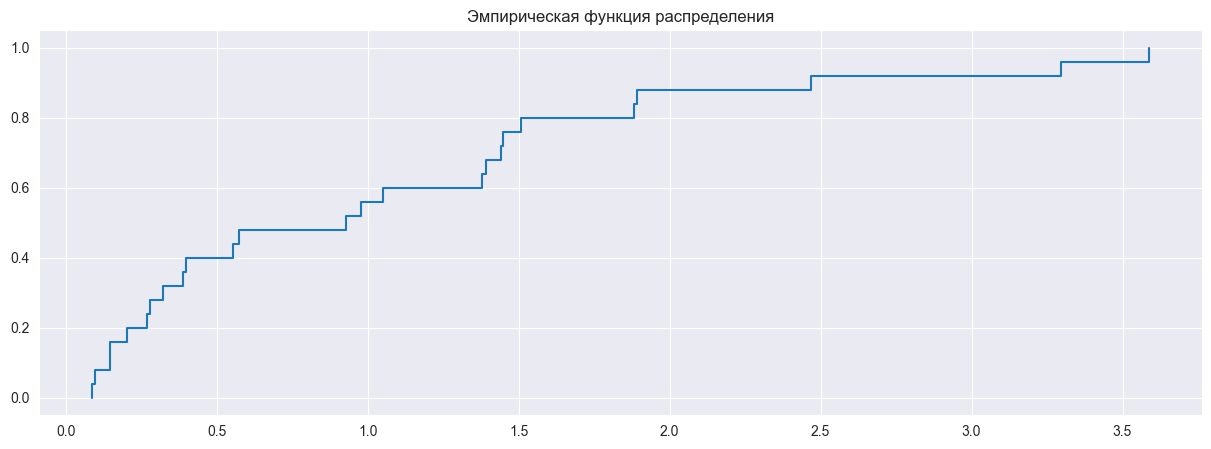

In [279]:
plt.figure(figsize=(15, 5))

# Эмпирическая функция распределения
plt.subplot(1, 1, 1)
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, where="post")
plt.title("Эмпирическая функция распределения")

Text(0.5, 1.0, 'Гистограмма')

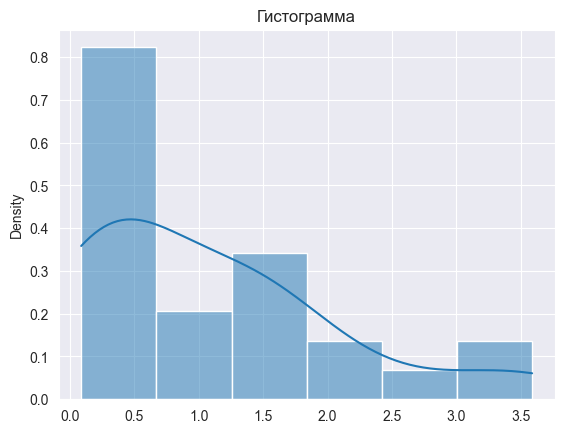

In [280]:
# Гистограмма

n = len(sample)
k = int(math.ceil(1 + np.log2(n)))

sns.histplot(sample, bins=k, stat='density', kde=True)
plt.title("Гистограмма")


Text(0.5, 1.0, 'Boxplot')

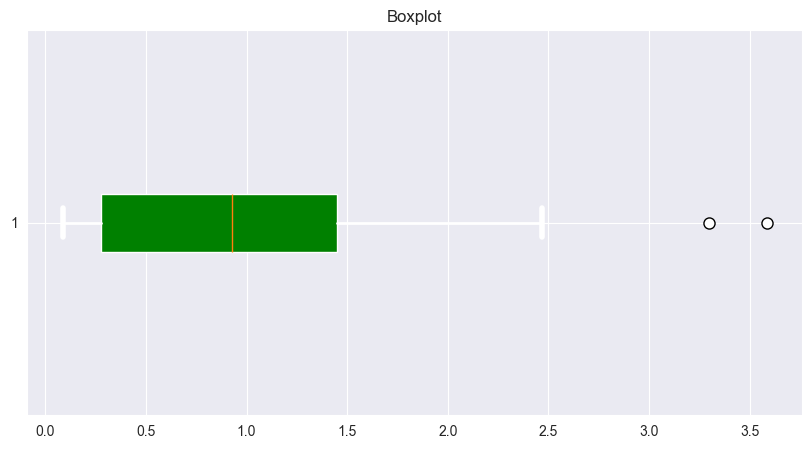

In [281]:
from matplotlib.ticker import AutoMinorLocator

# Boxplot

_, axs = plt.subplots(1, 1, figsize=(10, 5))

# Заголовок
axs.set_title("Boxplot")
order_statistics = sorted(sample)

# Построение boxplot
plt.boxplot(x=order_statistics,
            vert=False,
            patch_artist=True,  # Заливка ящика цветом
            boxprops={"facecolor": "green", "color": "white", "linewidth": 1},  # Свойства ящика
            whiskerprops={"color": "white", "linewidth": 2},  # Свойства усов
            capprops={"color": "white", "linewidth": 4},  # Свойства "шапок" усов
            flierprops={'markerfacecolor': 'white', 'markersize': 8})  # Свойства выбросов

plt.title('Boxplot')

**с) Сравнить оценку плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ, с бутстраповской оценкой плотности**

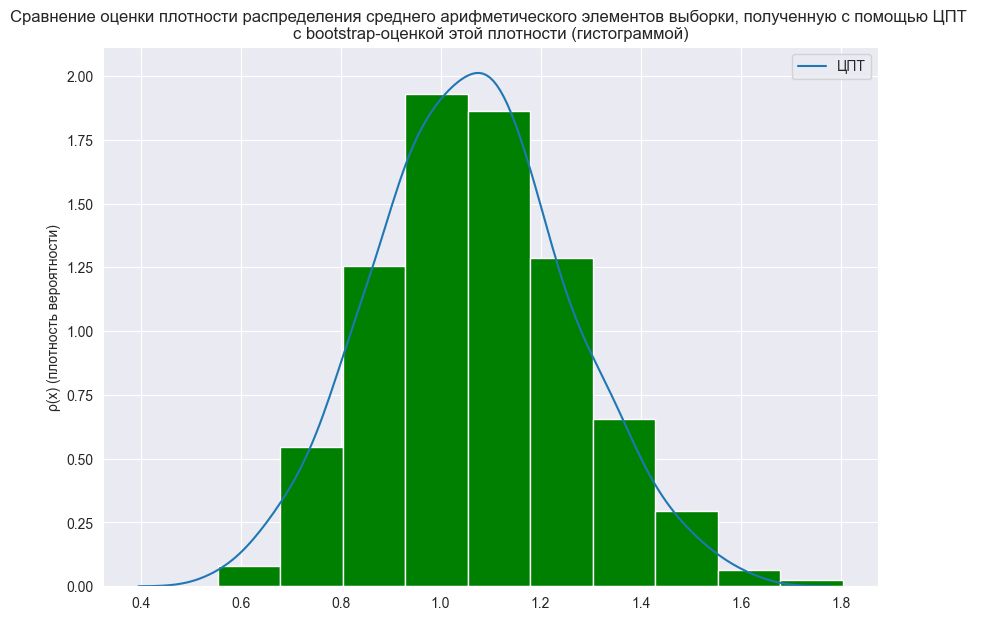

In [282]:
_, axs = plt.subplots(1, 1, figsize=(10, 7))
bootstrap_means = [np.mean(np.random.choice(sample, size=n, replace=True)) for _ in range(1000)]

axs.set_ylabel("ρ(x) (плотность вероятности)")
axs.set_title("Сравнение оценки плотности распределения среднего арифметического элементов выборки, полученную с помощью ЦПТ \nс bootstrap-оценкой этой плотности (гистограммой)")

axs.hist(bootstrap_means,
          bins=1+int(np.log2(1000)),
          color='green',
          density=True)
sns.kdeplot(np.random.normal(np.mean(sample), np.std(sample) / np.sqrt(n), size=1000), label="ЦПТ")
plt.legend()
plt.show()


**d) Найти бутстраповскую оценку плотности распределения коэффициента асимметрии и оценить вероятность того, что коэффициент асимметрии будет меньше 1.**

prob_skew_less_than_1: 0.47


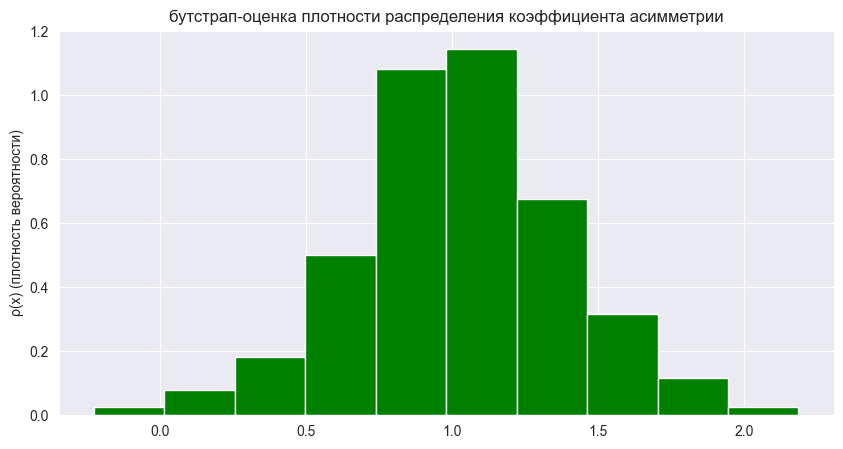

In [283]:
_, axs = plt.subplots(1, 1, figsize=(10, 5))
axs.set_title("бутстрап-оценка плотности распределения коэффициента асимметрии")
axs.set_ylabel("ρ(x) (плотность вероятности)")
bootstrap_skewness = [skew(np.random.choice(sample, size=n, replace=True)) for _ in range(1000)]
axs.hist(bootstrap_skewness,
         bins=1 + int(np.log2(1000)),
         color='green',
         density=True)
prob_skew_less_than_1 = np.sum([1 if bootstrap_skewness[i] < 1 else 0 for i in range(1000)]) / 1000
print(f"prob_skew_less_than_1: {prob_skew_less_than_1:.2f}")
plt.show()

**e) Сравнить плотность распределения медианы выборки с бутстраповской оценкой этой плотности**

In [284]:
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

def Kappa(x):
    k = n // 2 + 1
    return n * p(x) * sp.special.comb(n - 1, k - 1) * ((1 - F(x)) ** (n - k)) * (F(x) ** (k - 1))

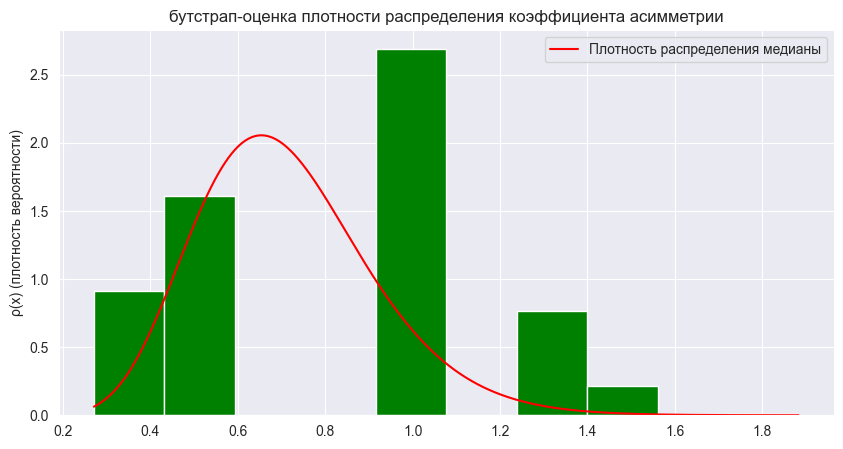

In [285]:
_, axs = plt.subplots(1, 1, figsize=(10, 5))

axs.set_title("бутстрап-оценка плотности распределения коэффициента асимметрии")
axs.set_ylabel("ρ(x) (плотность вероятности)")

bootstrap_medians = [np.median(np.random.choice(sample, size=n, replace=True)) for _ in range(1000)]


axs.hist(bootstrap_medians,
         bins=int(1 + np.log2(1000)),
         color="green",
         density=True)

x = np.linspace(min(bootstrap_medians),
                max(bootstrap_medians),
                1000)
axs.plot(x,
         [Kappa(x_i) for x_i in x],
         label="Плотность распределения медианы",
         color = "red")
plt.legend()
plt.show()